In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "cardiovascular-disease-dataset"

In [2]:
data<- read.csv("../input/cardiovascular-disease-dataset/cardio_train.csv", sep = ";")

In [3]:
head(data)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0
2,1,20228,1,156,85,140,90,3,1,0,0,1,1
3,2,18857,1,165,64,130,70,3,1,0,0,0,1
4,3,17623,2,169,82,150,100,1,1,0,0,1,1
5,4,17474,1,156,56,100,60,1,1,0,0,0,0
6,8,21914,1,151,67,120,80,2,2,0,0,0,0


# exporatory data analysis :

Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

In [4]:
sum(duplicated(data))

[1] 0

In [5]:
data<-subset(data,!duplicated(data))

In [6]:
#la colonne id n'attribut pas a notre etude alors on la supprime:
data<-subset(data,select=-c(1))

missing values:

In [7]:
sum(is.na(data))

[1] 0

la base de données ne contien aucune valeur non attribués


Outliers:

On etudie l'existance des annomalies pour les colonnes contenant les données quantitatives.

In [8]:
summary(data)

      age            gender         height          weight      
 Min.   :10798   Min.   :1.00   Min.   : 55.0   Min.   : 10.00  
 1st Qu.:17664   1st Qu.:1.00   1st Qu.:159.0   1st Qu.: 65.00  
 Median :19703   Median :1.00   Median :165.0   Median : 72.00  
 Mean   :19469   Mean   :1.35   Mean   :164.4   Mean   : 74.21  
 3rd Qu.:21327   3rd Qu.:2.00   3rd Qu.:170.0   3rd Qu.: 82.00  
 Max.   :23713   Max.   :2.00   Max.   :250.0   Max.   :200.00  
     ap_hi             ap_lo           cholesterol         gluc      
 Min.   : -150.0   Min.   :  -70.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:  120.0   1st Qu.:   80.00   1st Qu.:1.000   1st Qu.:1.000  
 Median :  120.0   Median :   80.00   Median :1.000   Median :1.000  
 Mean   :  128.8   Mean   :   96.63   Mean   :1.367   Mean   :1.226  
 3rd Qu.:  140.0   3rd Qu.:   90.00   3rd Qu.:2.000   3rd Qu.:1.000  
 Max.   :16020.0   Max.   :11000.00   Max.   :3.000   Max.   :3.000  
     smoke              alco             active        

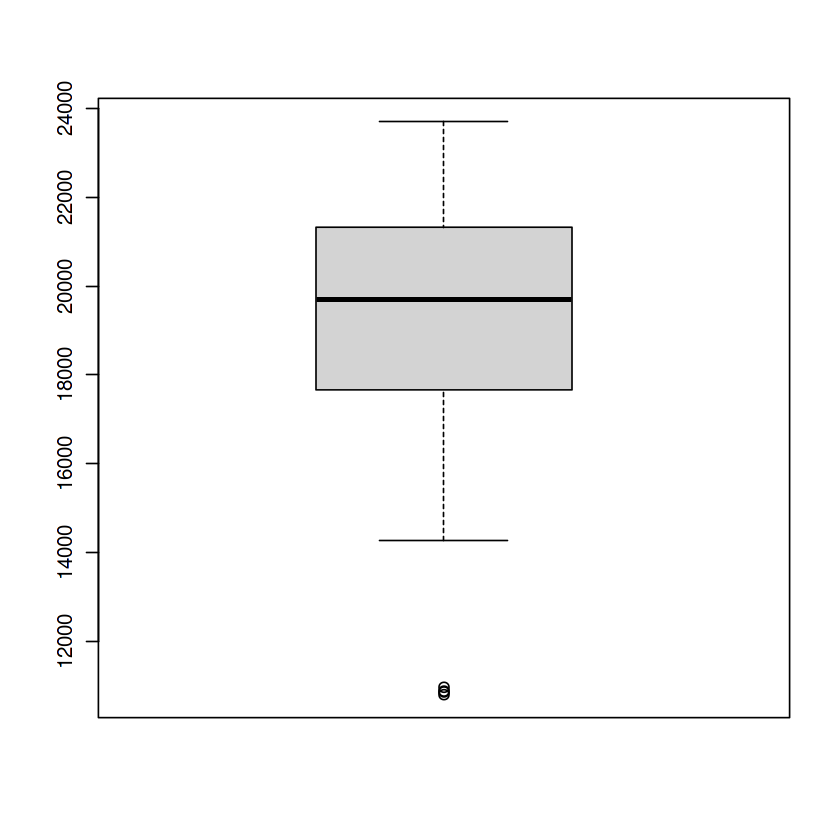

In [9]:
boxplot(data$age)

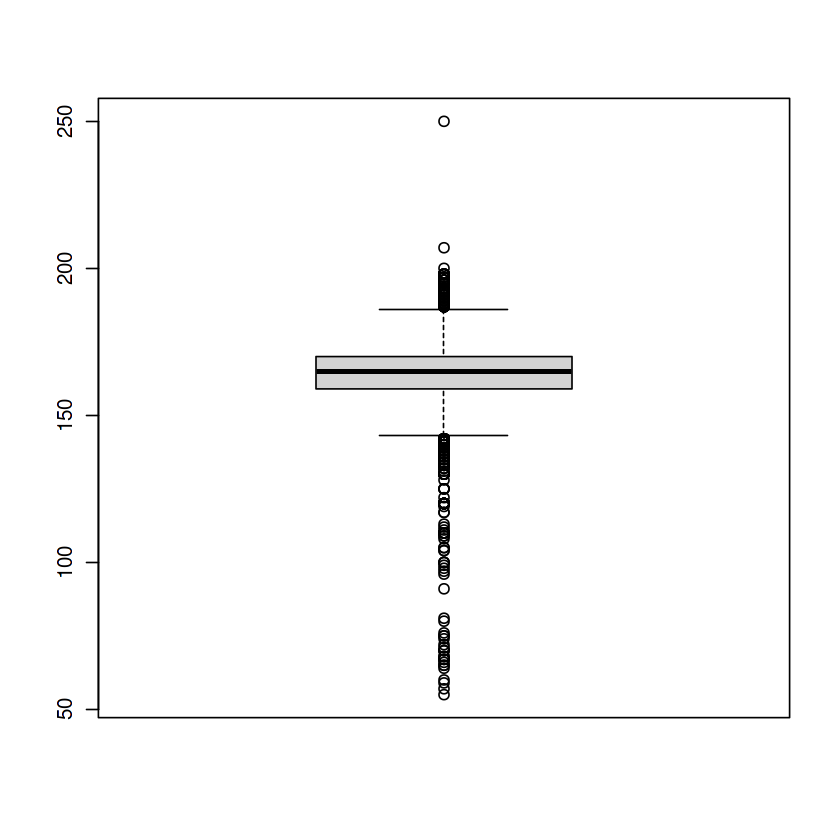

In [10]:
boxplot(data$height)

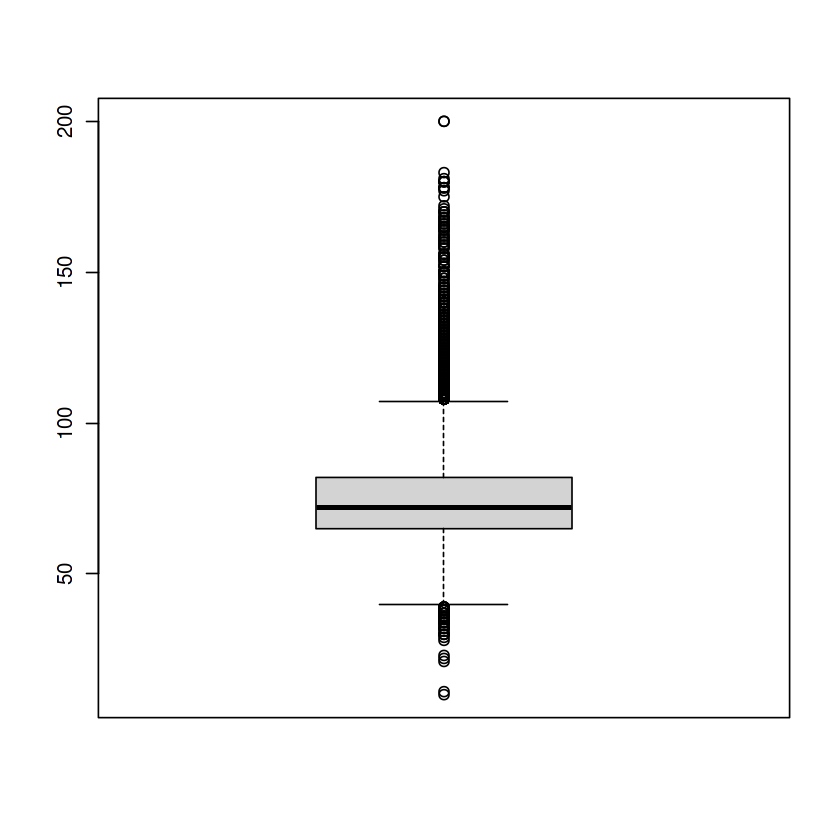

In [11]:
boxplot(data$weight)

Pour height et weight, en peut calculer le BMI (body max index) qui peut nous donner une valeur significative concernant les maladies cardiovasculaire:

In [12]:
#transformer du cm au m
data["height"]<-data["height"]/100 
data["BMI"]<-data["weight"]/data["height"]^2
head(data)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,18393,2,1.68,62,110,80,1,1,0,0,1,0,21.96712
2,20228,1,1.56,85,140,90,3,1,0,0,1,1,34.92768
3,18857,1,1.65,64,130,70,3,1,0,0,0,1,23.50781
4,17623,2,1.69,82,150,100,1,1,0,0,1,1,28.71048
5,17474,1,1.56,56,100,60,1,1,0,0,0,0,23.01118
6,21914,1,1.51,67,120,80,2,2,0,0,0,0,29.38468


In [13]:
data<-subset(data,select=-c(3,4))

In [14]:
#on transforme lage du jour au ans: 
data["age"]<-data["age"]/365

In [15]:
head(data)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,50.39178,2,110,80,1,1,0,0,1,0,21.96712
2,55.41918,1,140,90,3,1,0,0,1,1,34.92768
3,51.66301,1,130,70,3,1,0,0,0,1,23.50781
4,48.28219,2,150,100,1,1,0,0,1,1,28.71048
5,47.87397,1,100,60,1,1,0,0,0,0,23.01118
6,60.03836,1,120,80,2,2,0,0,0,0,29.38468


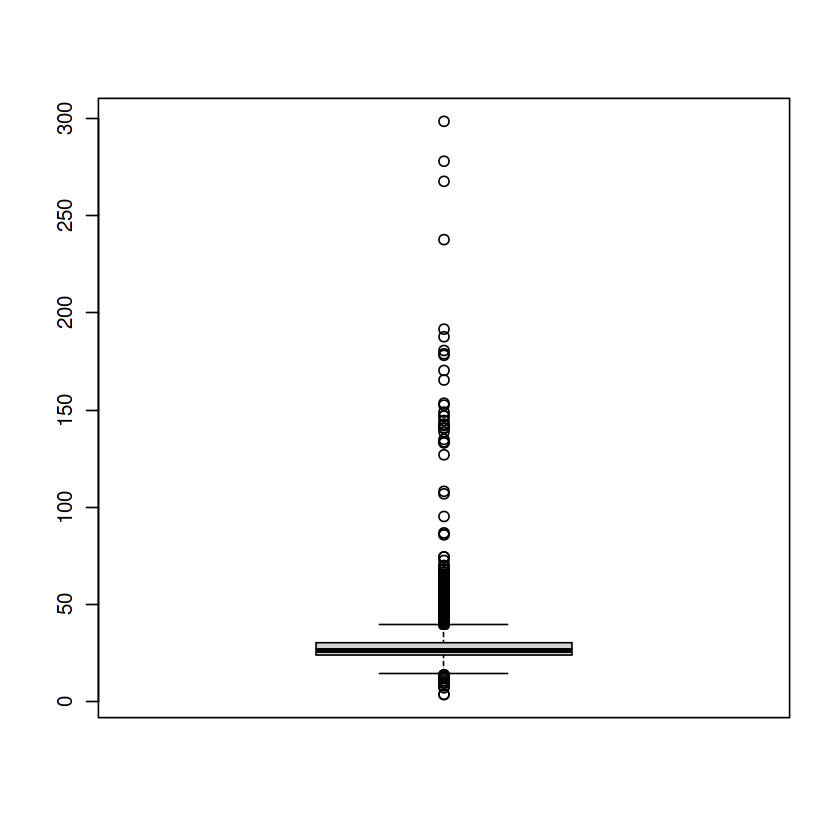

In [16]:
boxplot(data$BMI)

alors, les outliers presenter dans cet graphe ne presente aucune importance a notre etude, et sans clairement des anomalités. 
on peut les supprimer tout simplement en supprimant tout les lignes avec IBM supperieur a 50. Ou en utilisant la meme formule utiliser pour le calcul du boxplot : (Q1 - 1.5 * IQR) pour les annomalités inférieurs et  (Q3+ 1.5 * IQR) pour les anomalités supérieurs. le IQR=Q3-Q1 est l'interquartile range, avec Q1 et Q3 sont les quartiles inférieur et supérieur.

In [17]:
#calcule des quartiles:
Q <- quantile(data$BMI, probs=c(.25, .75))
#calcule du rang interquartile :
iqr <- IQR(data$BMI)
#les transformations pour eliminer les annomalités
data1<-subset(data,(data$ap_hi<240) &(data$ap_lo<240)&(data$ap_hi>0)&(data$ap_lo>0))
data1<-subset(data1,(data1$age>35))
data1<- subset(data1, data1$BMI > (Q[1] - 1.5*iqr) & data1$BMI < (Q[2]+1.5*iqr))

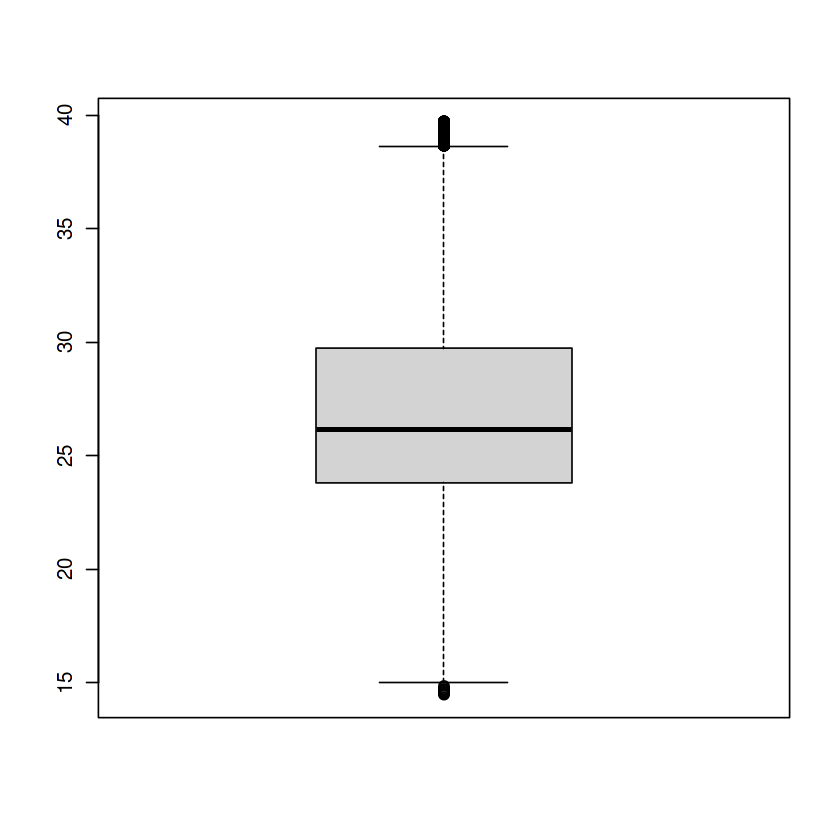

In [18]:
#le résultat:
boxplot(data1$BMI)

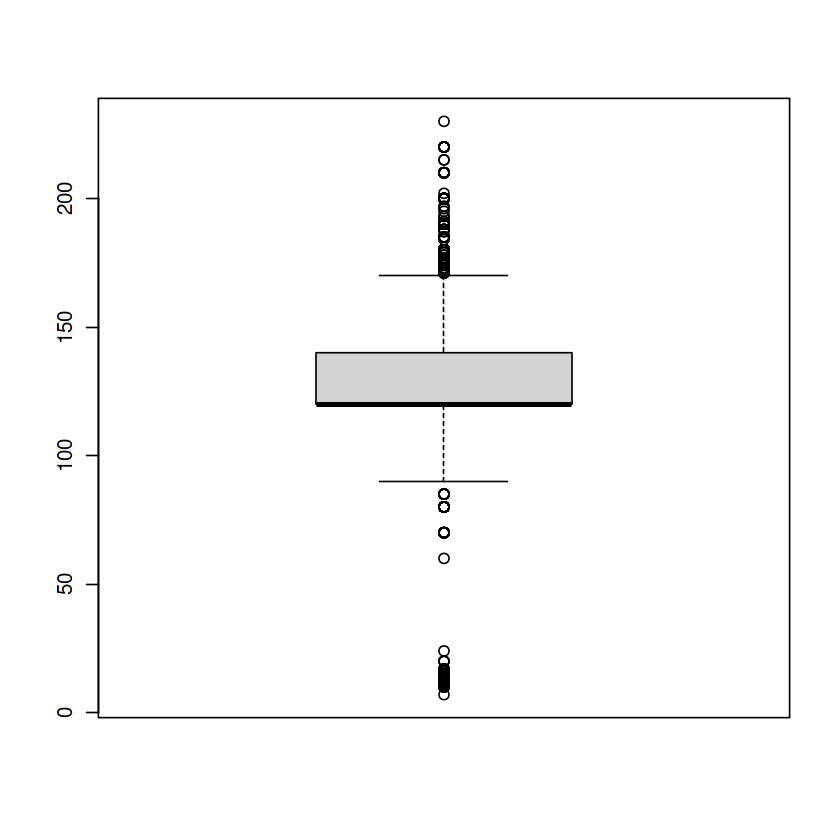

In [19]:
boxplot(data1$ap_hi)

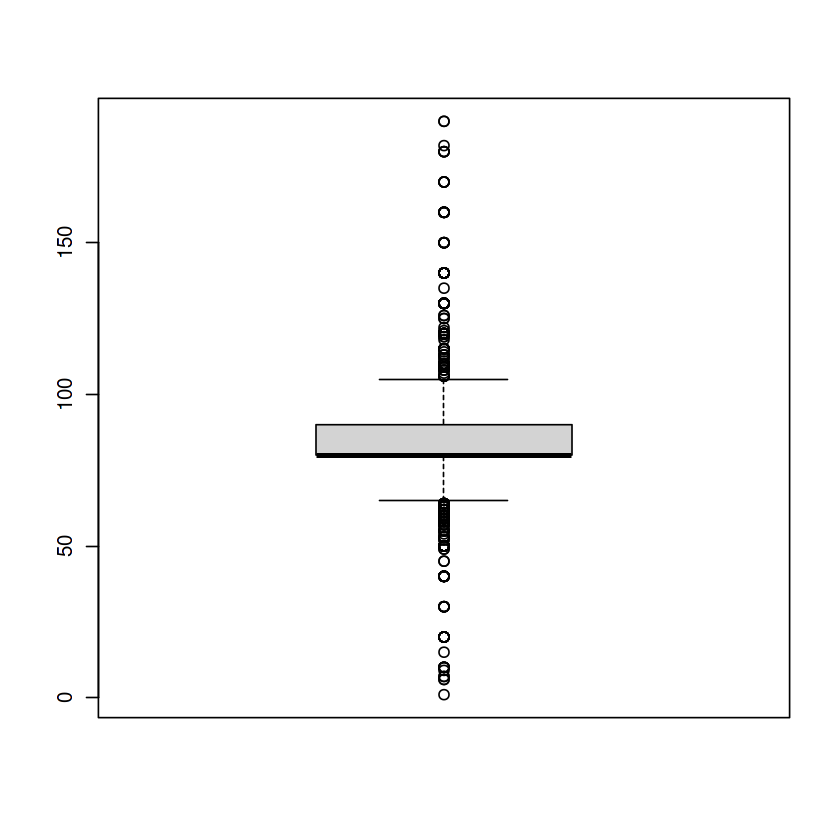

In [20]:
boxplot(data1$ap_lo)

Reste a prendre la decision si on veut supprimer les lignes contenant ces valeurs ou les remplacer par exemple par le mean (imputing technique). 
en effet, deja pour la prediction d'existance ou pas d'une maladie ces valeurs extremes peuvent attribuer une signification, car c'est normal que les personnes ayant une maladie d'avoir des valeurs differentes que celle du reste de la population. 
On effectue une etude de correlation pour faire la decision

On etudie la signification des variables ap-lo et ap-hi au niveau medical, pour decider si ces valeurs extremes presente une signification a notre etude ou si ne sont que des fautes lors de collection des données.

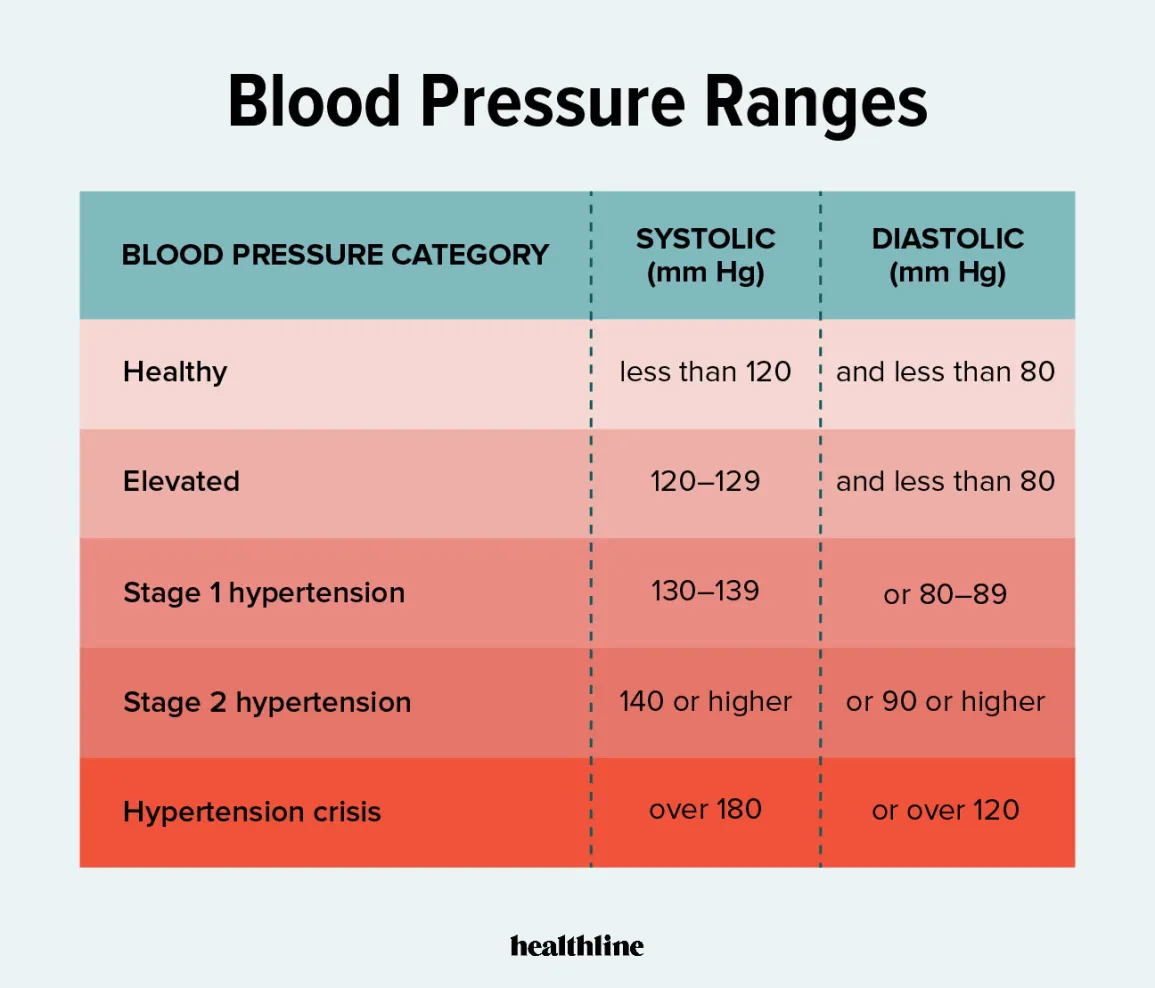

le tableau precedant presente une classification des valeurs systolic et diastolic blood pressure, on remarque que systolic est toujours superieur au diastolic. alors tout ligne de notre base de donnée contenant ap_lo superieur a ap_hi est une anomalie

In [21]:
sum((data1$ap_lo) > (data1$ap_hi))

[1] 266

In [22]:
#ces anomalies sont de totale 266, on les supprime 
data2<-subset(data1,(data1$ap_lo) < (data1$ap_hi))

In [23]:
summary(data2)

      age            gender          ap_hi           ap_lo       
 Min.   :39.11   Min.   :1.000   Min.   : 16.0   Min.   :  1.00  
 1st Qu.:48.34   1st Qu.:1.000   1st Qu.:120.0   1st Qu.: 80.00  
 Median :53.96   Median :1.000   Median :120.0   Median : 80.00  
 Mean   :53.30   Mean   :1.355   Mean   :126.4   Mean   : 81.12  
 3rd Qu.:58.40   3rd Qu.:2.000   3rd Qu.:140.0   3rd Qu.: 90.00  
 Max.   :64.97   Max.   :2.000   Max.   :230.0   Max.   :182.00  
  cholesterol         gluc           smoke              alco        
 Min.   :1.000   Min.   :1.000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :1.000   Median :1.000   Median :0.00000   Median :0.00000  
 Mean   :1.357   Mean   :1.221   Mean   :0.08894   Mean   :0.05328  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :3.000   Max.   :3.000   Max.   :1.00000   Max.   :1.00000  
     active           cardio            BMI       
 Min

on caracterise les données du colonne ap_hi et ap_lo suivant les classes presenté par le tableau si dessus, car apparament il y'a pas de difference significative entre les measures de tension en meme categorie, c'est plutot une etude de variables qualitatives non pas quantitatives. On fait un label encoding: 1:healty 2:elavated 3:stage1 4:stage2 5:crise dhypertension.

In [24]:
categor <-function(hi,lo){
    r<-0
    if (hi<120 && lo<80)
       { r<-1}
    else if (hi<130 && lo<80 && hi>=120 )
       {r<-2}
    else if ((hi<139 && hi>=130)  ||(lo<=89 && lo>=80))
       {r<-3}
    else if ((hi>=140 && hi<180)  ||(lo<=120 && lo>=90))
       {r<-4}
    else if (hi>=180  ||lo>=120)
       {r<-5}
    return (r)
}

In [25]:
vec<-categor(data2["ap_hi"],data2["ap_lo"])
print(vec)
#data2["category"] <-lapply( data2$ap_hi,data2$ap_lo,categor)
#data2$categor<-vect

[1] 3


In [26]:
head(data2)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,50.39178,2,110,80,1,1,0,0,1,0,21.96712
2,55.41918,1,140,90,3,1,0,0,1,1,34.92768
3,51.66301,1,130,70,3,1,0,0,0,1,23.50781
4,48.28219,2,150,100,1,1,0,0,1,1,28.71048
5,47.87397,1,100,60,1,1,0,0,0,0,23.01118
6,60.03836,1,120,80,2,2,0,0,0,0,29.38468


# Analyse Descriptive:

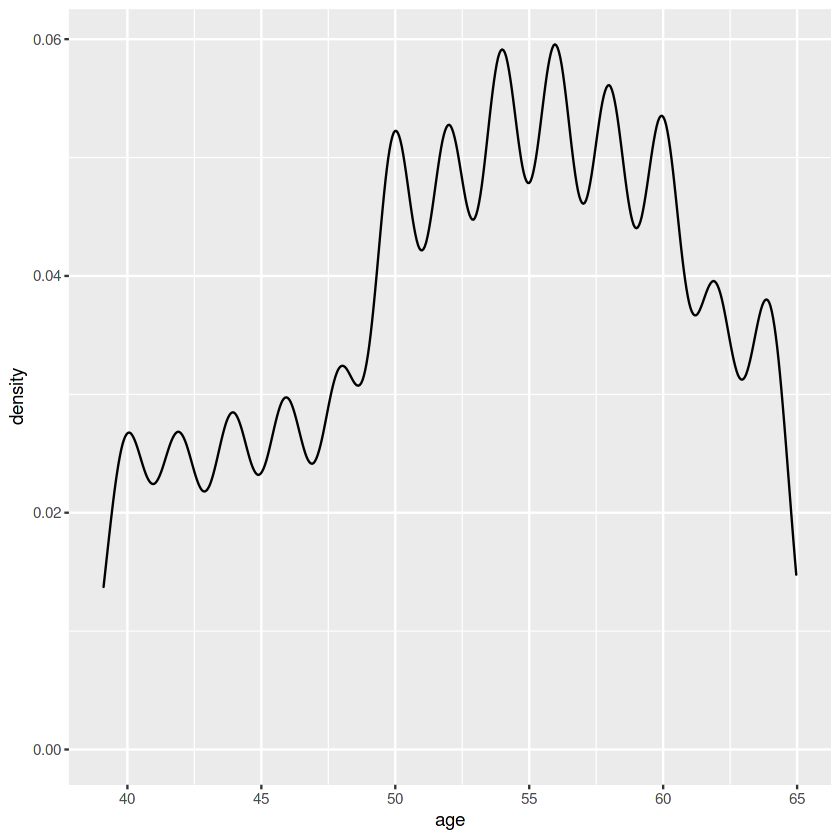

In [27]:
#on utilise la bib ggplot2 pour visualiser la distribution des variables continue quantitatives: 
library(ggplot2)
ggplot(data2,aes(x=age))+geom_density()

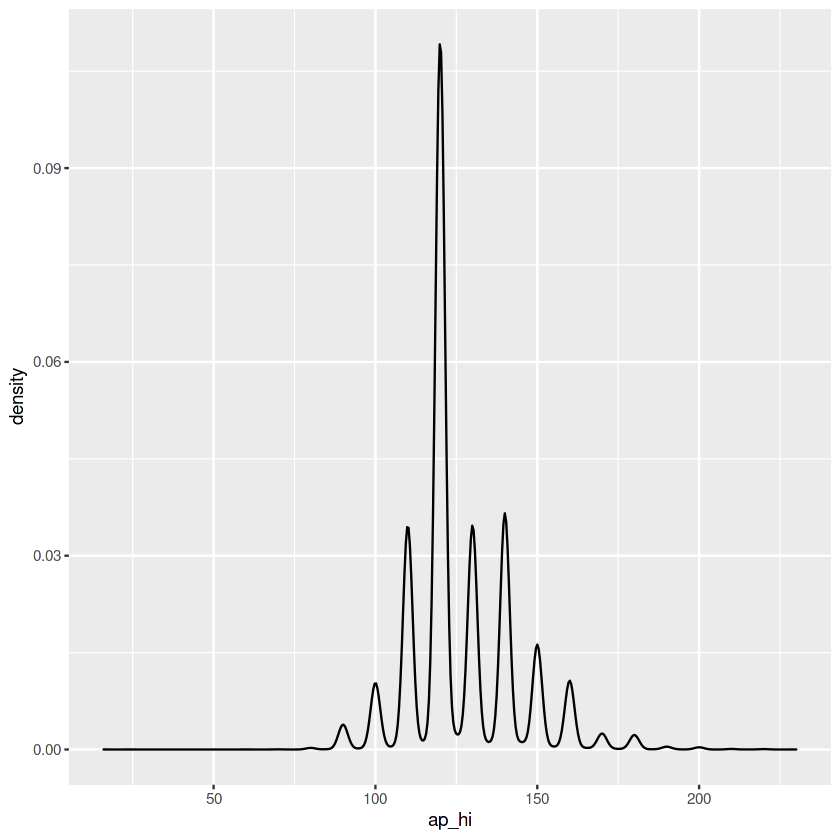

In [28]:
ggplot(data2,aes(x=ap_hi))+geom_density()

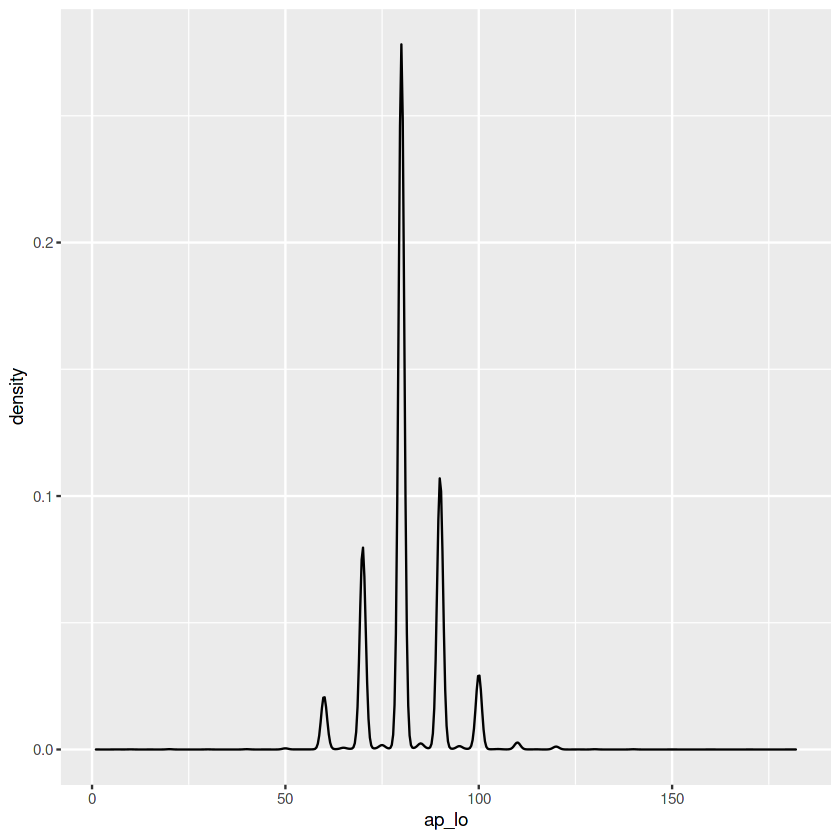

In [29]:
ggplot(data2,aes(x=ap_lo))+geom_density()

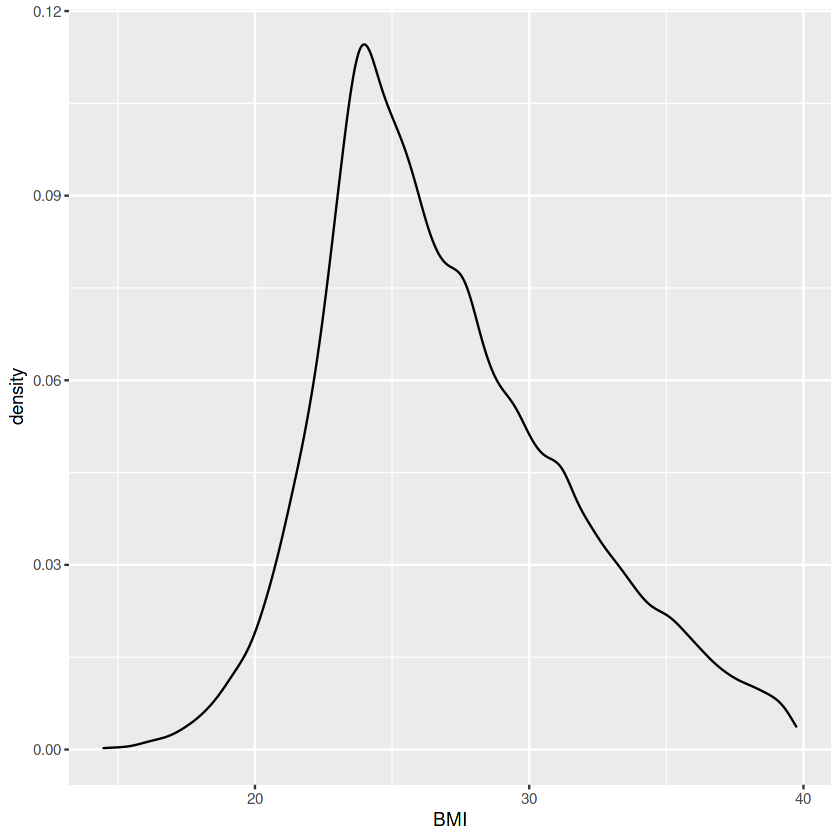

In [30]:
ggplot(data2,aes(x=BMI))+geom_density()

Des trois graphes precedants on remarque qu'on a pas une distribution normale a variance constante dans les variables quantitatives. 
On utilise des tests non parametriques de Kurskal wallis pour etudier la correlation entre eux

In [31]:
kruskal.test(data2$age~data2$ap_hi,data=data2)
kruskal.test(data2$age~data2$ap_lo,data=data2)
kruskal.test(data2$age~data2$BMI,data=data2)
kruskal.test(data2$ap_hi~data2$ap_lo,data=data2)
kruskal.test(data2$ap_hi~data2$BMI,data=data2)
kruskal.test(data2$ap_lo~data2$BMI,data=data2)


	Kruskal-Wallis rank sum test

data:  data2$age by data2$ap_hi
Kruskal-Wallis chi-squared = 3655.9, df = 108, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  data2$age by data2$ap_lo
Kruskal-Wallis chi-squared = 1932.3, df = 89, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  data2$age by data2$BMI
Kruskal-Wallis chi-squared = 4215.7, df = 2997, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  data2$ap_hi by data2$ap_lo
Kruskal-Wallis chi-squared = 37375, df = 89, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  data2$ap_hi by data2$BMI
Kruskal-Wallis chi-squared = 8243.7, df = 2997, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  data2$ap_lo by data2$BMI
Kruskal-Wallis chi-squared = 7477.7, df = 2997, p-value < 2.2e-16


pour les variables qualitatives entre eux: on utilise le test pearson chi deux: 
du graphe du matrice de correlation on remarque que active n'est correle significativement avec aucun variable. on test lhypothese  les autres

In [32]:
table1=table(data2$gender,data2$smoke)
chisq.test(table1)
table2=table(data2$gender,data2$alco)
chisq.test(table2)
table3=table(data2$cholesterol,data2$gluc)
chisq.test(table3)
table4=table(data2$smoke,data2$alco)
chisq.test(table4)


	Pearson's Chi-squared test with Yates' continuity correction

data:  table1
X-squared = 7675.6, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  table2
X-squared = 1972.4, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table3
X-squared = 20685, df = 4, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  table4
X-squared = 7918.2, df = 1, p-value < 2.2e-16


In [33]:
kruskal.test(data2$cholesterol~data2$age,data=data2)
kruskal.test(data2$cholesterol~data2$ap_hi,data=data2)


	Kruskal-Wallis rank sum test

data:  data2$cholesterol by data2$age
Kruskal-Wallis chi-squared = 9289.7, df = 8042, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  data2$cholesterol by data2$ap_hi
Kruskal-Wallis chi-squared = 3759.5, df = 108, p-value < 2.2e-16


* conclusion: y'a une correlation entre tout les variables expliquatives.

On etudie la relation entre chaque variable expliqutive avec la variable reponse:

[1] 0.4309246 0.5917431 0.7599946

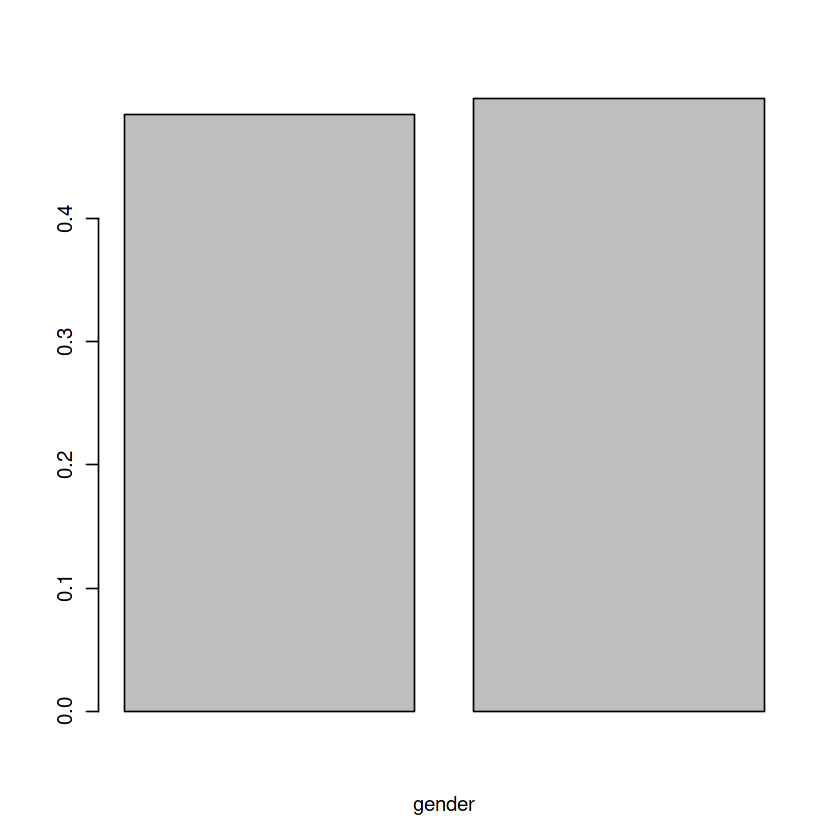

[1] 0.4705583 0.5814050 0.6137598

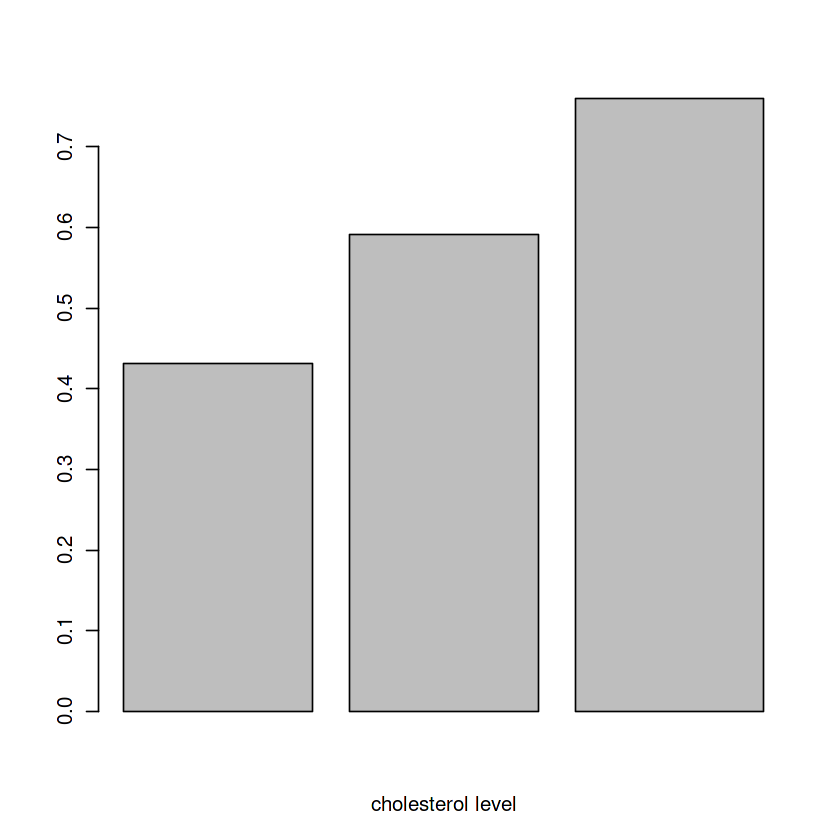

[1] 0.4916009 0.4643879

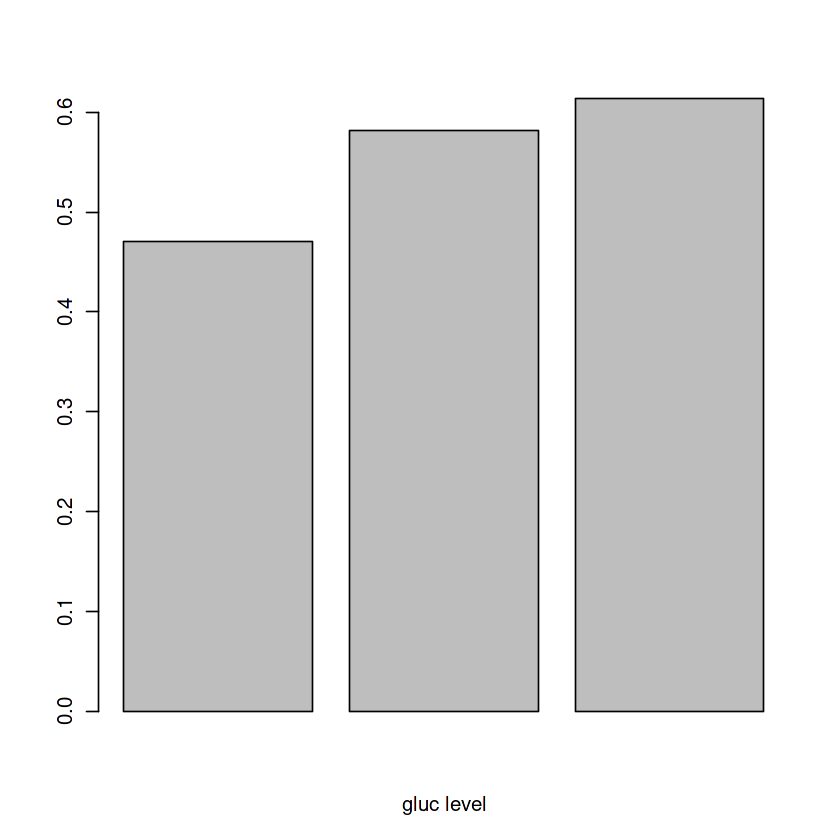

[1] 0.4902643 0.4699269

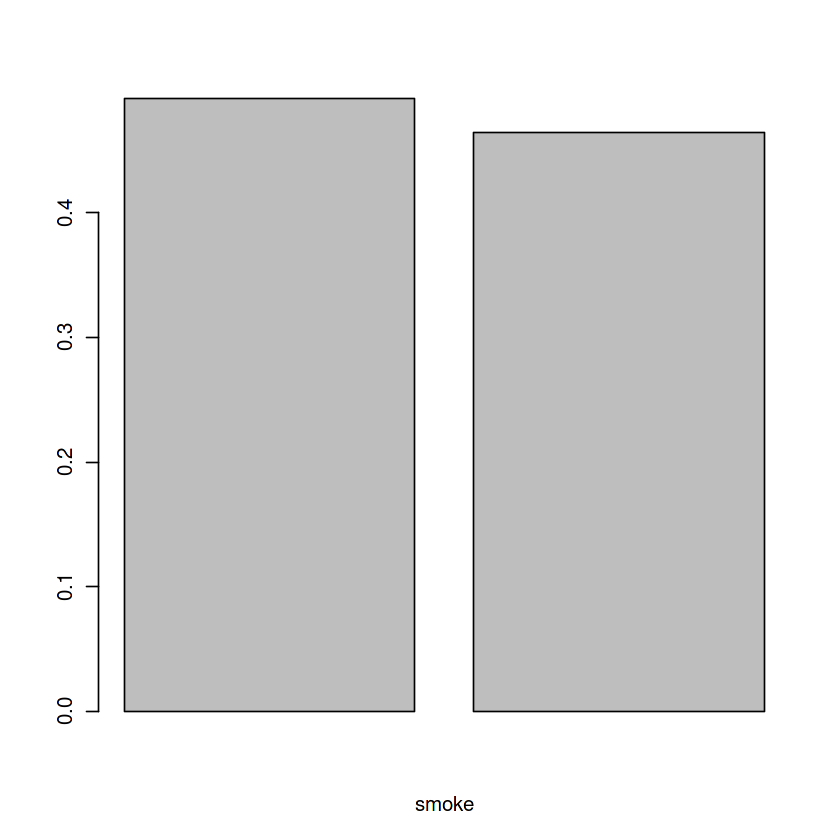

[1] 0.5256351 0.4803113

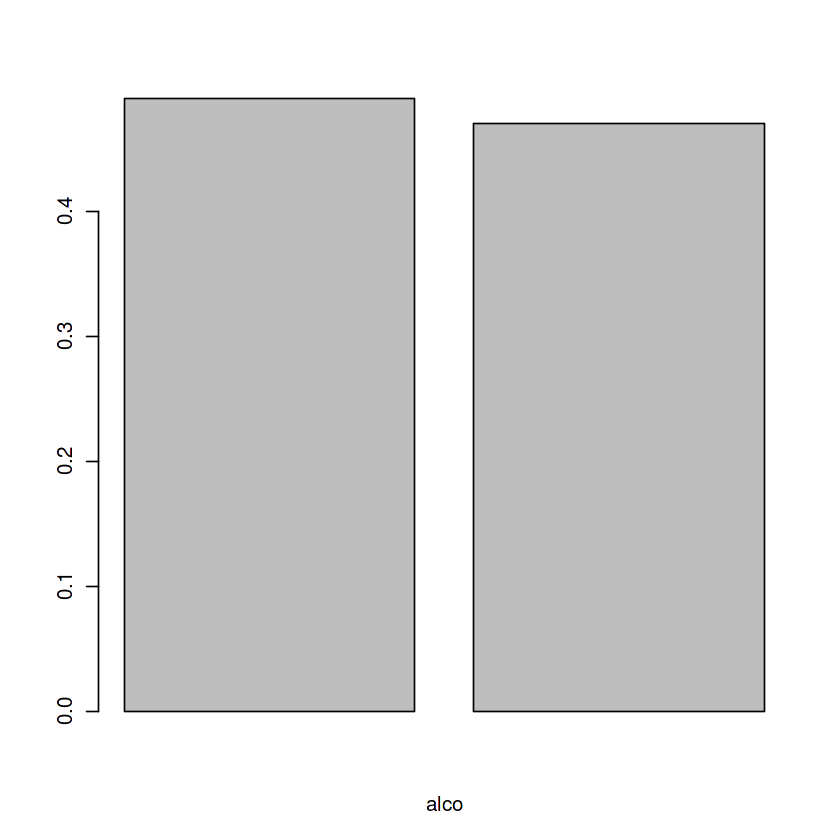

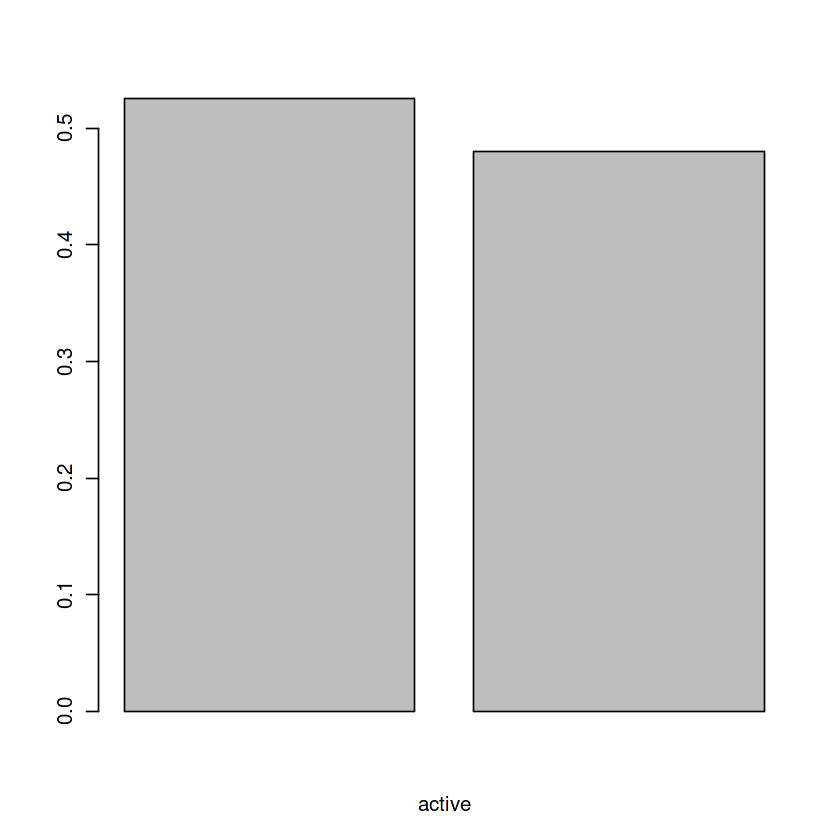

In [34]:
#visualisation des difference de proportion des patients ayant une maladie cardiovasculaire 
#dans chaque classe des variables qualitatives.
m1<-mean(data2$cardio[data2$gender==1])
m2<-mean(data2$cardio[data2$gender==2])

m<-c(m1,m2)
barplot(m,xlab="gender")
c1<-mean(data2$cardio[data2$cholesterol==1])
c2<-mean(data2$cardio[data2$cholesterol==2])
c3<-mean(data2$cardio[data2$cholesterol==3])
m<-c(c1,c2,c3)
m
barplot(m,xlab="cholesterol level")
c1<-mean(data2$cardio[data2$gluc==1])
c2<-mean(data2$cardio[data2$gluc==2])
c3<-mean(data2$cardio[data2$gluc==3])
m<-c(c1,c2,c3)
m
barplot(m,xlab="gluc level")
m1<-mean(data2$cardio[data2$smoke==0])
m2<-mean(data2$cardio[data2$smoke==1])

m<-c(m1,m2)
m
barplot(m,xlab="smoke")
m1<-mean(data2$cardio[data2$alco==0])
m2<-mean(data2$cardio[data2$alco==1])

m<-c(m1,m2)
m
barplot(m,xlab="alco")
m1<-mean(data2$cardio[data2$active==0])
m2<-mean(data2$cardio[data2$active==1])

m<-c(m1,m2)
m
barplot(m,xlab="active")



In [35]:
#on etudie la significativité de la difference de ces moyennes, test d'hypothese 
#on utilise le test chi square de pearson:
t1=table(data2$cardio,data2$gender)
chisq.test(t1)

t2=table(data2$cardio,data2$smoke)
chisq.test(t2)


t3=table(data2$cardio,data2$alco)
chisq.test(t3)

t4=table(data2$cardio,data2$active)
chisq.test(t4)

t5=table(data2$cardio,data2$cholesterol)
chisq.test(t5)

t6=table(data2$cardio,data2$gluc)
chisq.test(t6)


	Pearson's Chi-squared test with Yates' continuity correction

data:  t1
X-squared = 10.025, df = 1, p-value = 0.001544



	Pearson's Chi-squared test with Yates' continuity correction

data:  t2
X-squared = 15.927, df = 1, p-value = 6.585e-05



	Pearson's Chi-squared test with Yates' continuity correction

data:  t3
X-squared = 5.4944, df = 1, p-value = 0.01908



	Pearson's Chi-squared test with Yates' continuity correction

data:  t4
X-squared = 86.226, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  t5
X-squared = 3248.3, df = 2, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  t6
X-squared = 551.14, df = 2, p-value < 2.2e-16


conclusion: tout les variables sont associé a la presence d'une maladie cardiovasculaire, alco et gender presentent une correlation faible.

Hypothese: la proportion de cardio=1 est associé au variables continues? 
puisque la normalité de distribution des variables quantitatives n'est pas verifié, on ne peut pas utiliser anova.. alors on utilise le test de kurskall wallis sur chaque variable, ou on se suffira par comparer les boxplot

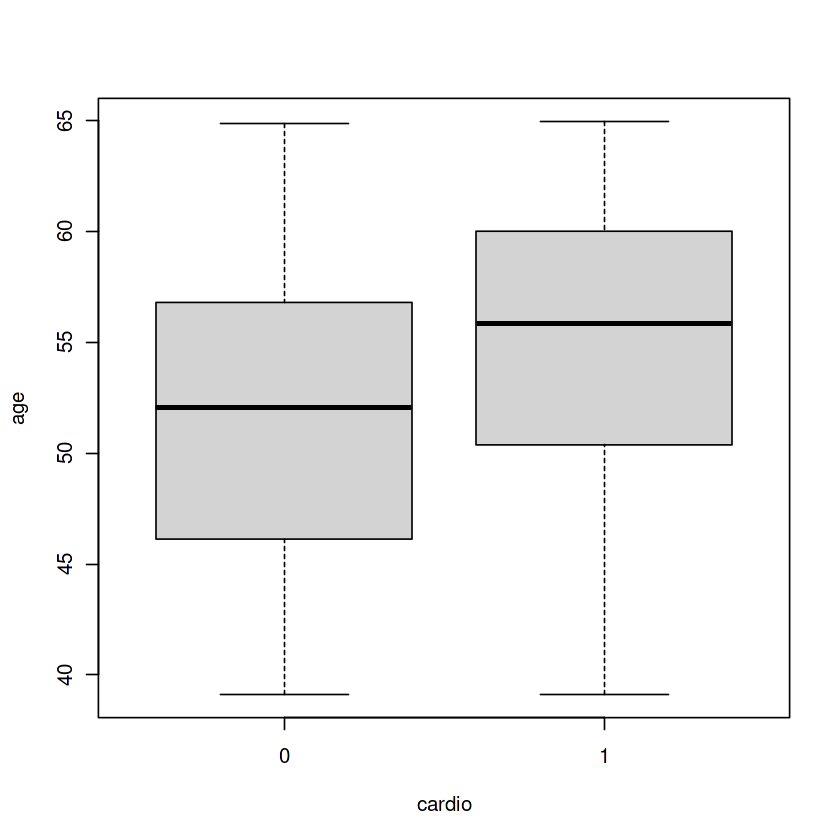

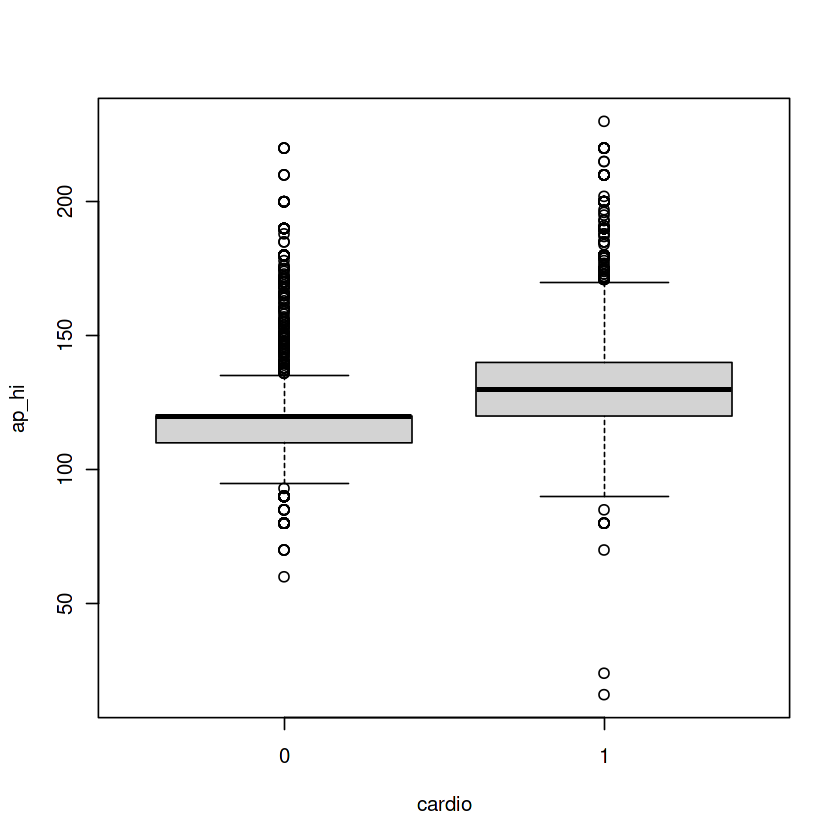

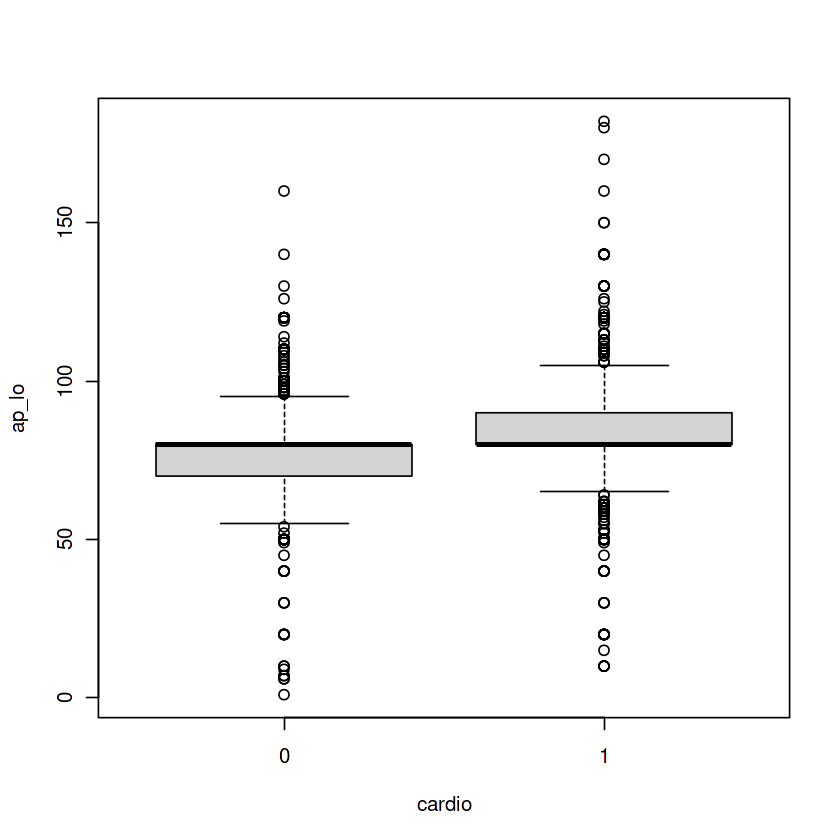

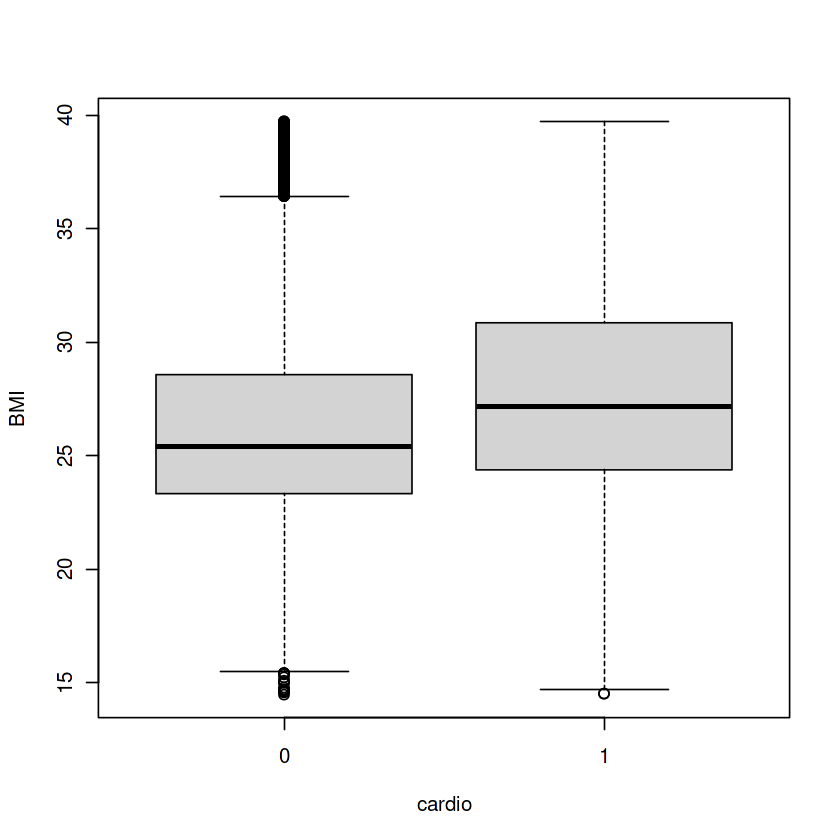

In [36]:
boxplot(age~cardio,data=data2)
boxplot(ap_hi~cardio,data=data2)
boxplot(ap_lo~cardio,data=data2)
boxplot(BMI~cardio,data=data2)

# Analyse Predictive:

conclusion: 
- la propabilité d'avoir une maladie cardiovasculaire est superieur pour les patients ayant: (BMI ou ap_lo ou ap_hi ou age) superieur cad:
- les gents agés sont plus susceptible a avoir une maladie cardiovaculaire
- les patients ayant un rapport BMI superieur sont plus susceptible a avoir une maladie cardiovaculaire.
- les patients ayant une des valeurs  Systolic blood pressure et diastolic blood pressure elevé sont plus susceptible.

# splitting the data

In [37]:
library(splitTools)
library(ranger)
inds <- partition(data2$cardio, p = c(train = 0.7, test = 0.3))
str(inds)
train <- data2[inds$train, ]
#valid <- data2[inds$valid, ]
test <- data2[inds$test, ]

List of 2
 $ train: int [1:46745] 1 2 3 4 5 7 8 9 13 16 ...
 $ test : int [1:20034] 6 10 11 12 14 15 18 27 37 46 ...


In [38]:
# on compare si le pourcentage des lignes avec cardio=0 
#est le meme que celui du base de données entiere 
#dans chaque sous ensemble (resp. cardio=1)
global0<- (sum(data2$cardio==0)/sum(data2))*100
a<-(sum(train$cardio==0)/sum(train))*100
(global0-a)<0.1
b<-(sum(test$cardio==0)/sum(test))*100
(global0-b)<0.1
#c<-(sum(valid$cardio==0)/sum(valid))*100
#(global0-c)<0.1
global1<- (sum(data2$cardio==1)/sum(data2))*100
a<-(sum(train$cardio==1)/sum(train))*100
(global1-a)<0.1

[1] TRUE

[1] TRUE

[1] TRUE

# Feature selection

#on visualise la correlation entre variables:
pour la variable dependant cardio sera etudier separement.. on etudie au debut la correlation entre les autres variables pour:
- etudier la colinearite entre varibles expliquatives.. si c'est une correlation forte donc on introduit des variables d'effet d'interaction 
puis apres etudier la correlation des variables independants (d'interaction inclus) on compare leurs impacts sur la variable dependante et en annule ceux a impact faible soit en effectuant des tests chi square ou kurskal wallis, ou autrement on utilise un algorithme de selection step wise backward forward par exemple

corrplot 0.88 loaded



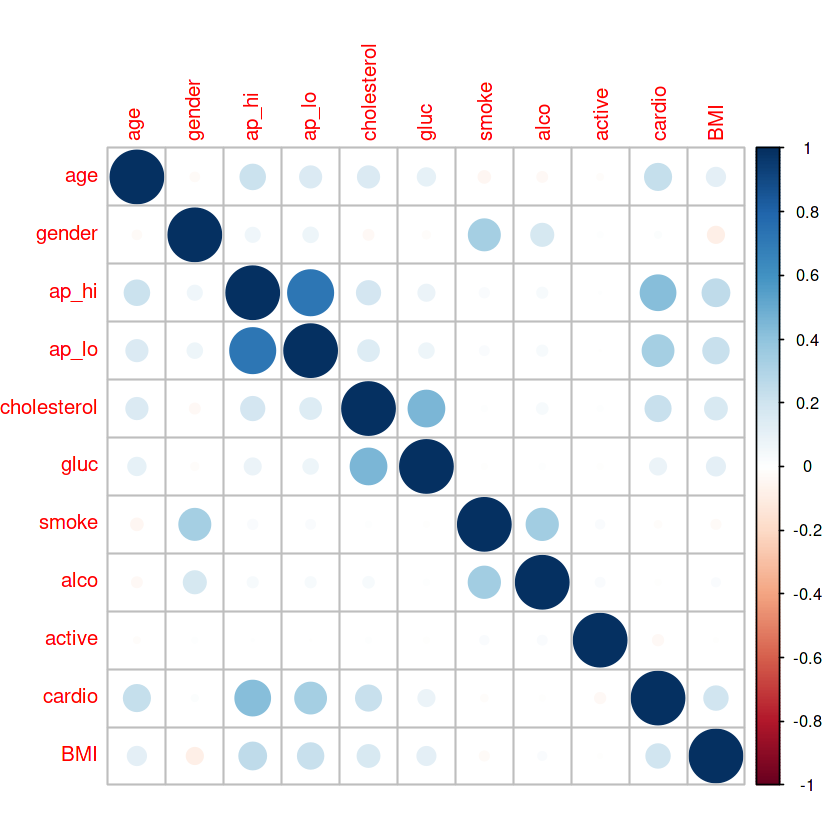

In [39]:
library(corrplot)
datacorr<-cor(train[,c(1,2,3,4,5,6,7,8,9,10,11)])
corrplot(datacorr)

on ajoute les variables d'interactions: ap_hi*ap_lo, cholesterol*gluc smoke*gender BMI*ap_hi

# Test d'hypothéses de regression logistique:

1. la variable réponse (cardio) est bianire 

2. Observations independates: on a chaque ligne presente les données d'un patient et les replications sont supprimés alors hypothése vérifier


3. jeu de données large: on a approximativement 70000 observations, hypo vérifié

4. Multicolinéarité faible:

on teste la multicolinnéarité en utilisant le VIF sur un modele lineaire:

In [40]:
#modele lineaire 
model<-glm(cardio~age+gender+ap_hi+ap_lo+cholesterol+gluc+smoke+alco+active+BMI+(ap_hi*ap_lo)+ (cholesterol*gluc)+(smoke*gender)+(BMI*ap_hi),data=data2)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




age           gender            ap_hi            ap_lo 
        1.075741         1.212916        56.807294        29.762090 
     cholesterol             gluc            smoke             alco 
        5.441991         6.967232        30.736432         1.145414 
          active              BMI      ap_hi:ap_lo cholesterol:gluc 
        1.001740        58.615087       109.354111        15.081755 
    gender:smoke        ap_hi:BMI 
       31.581336       119.324521

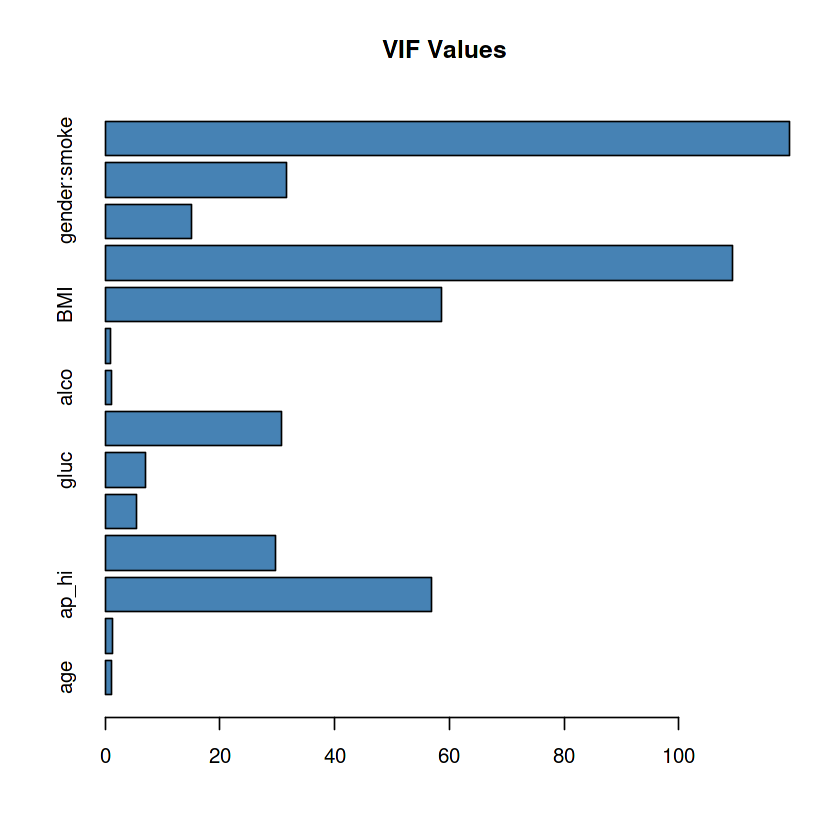

In [41]:
library(car)
v<-vif(model)
barplot(v, main = "VIF Values", horiz = TRUE, col = "steelblue")
v

les valeurs enormes sont des variables ayant un variable d'interaction entre eux, on verifie cette hypothese on calculant les valeurs sans varibles interavtives:

age      gender       ap_hi       ap_lo cholesterol        gluc 
   1.068477    1.155256    2.202588    2.119310    1.317023    1.257718 
      smoke        alco      active         BMI 
   1.251632    1.142746    1.001396    1.109124

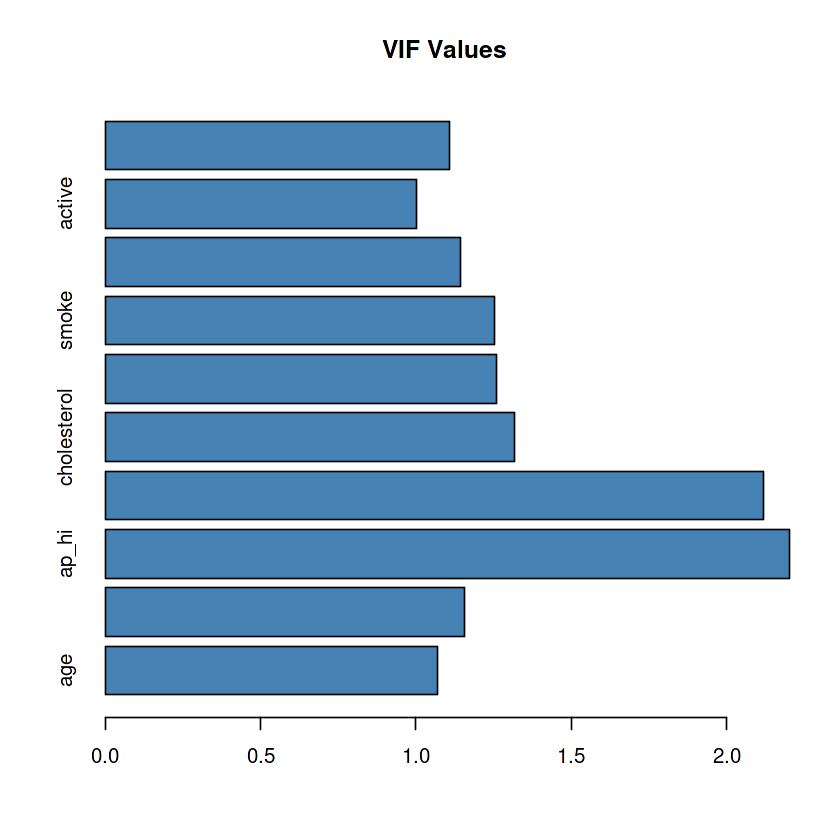

In [42]:
model1<-glm(cardio~age+gender+ap_hi+ap_lo+cholesterol+gluc+smoke+alco+active+BMI,data=data2)
v<-vif(model1)
barplot(v, main = "VIF Values", horiz = TRUE, col = "steelblue")
v

age      gender       ap_hi       ap_lo cholesterol        gluc 
   1.068477    1.155256    2.202588    2.119310    1.317023    1.257718 
      smoke        alco      active         BMI 
   1.251632    1.142746    1.001396    1.109124

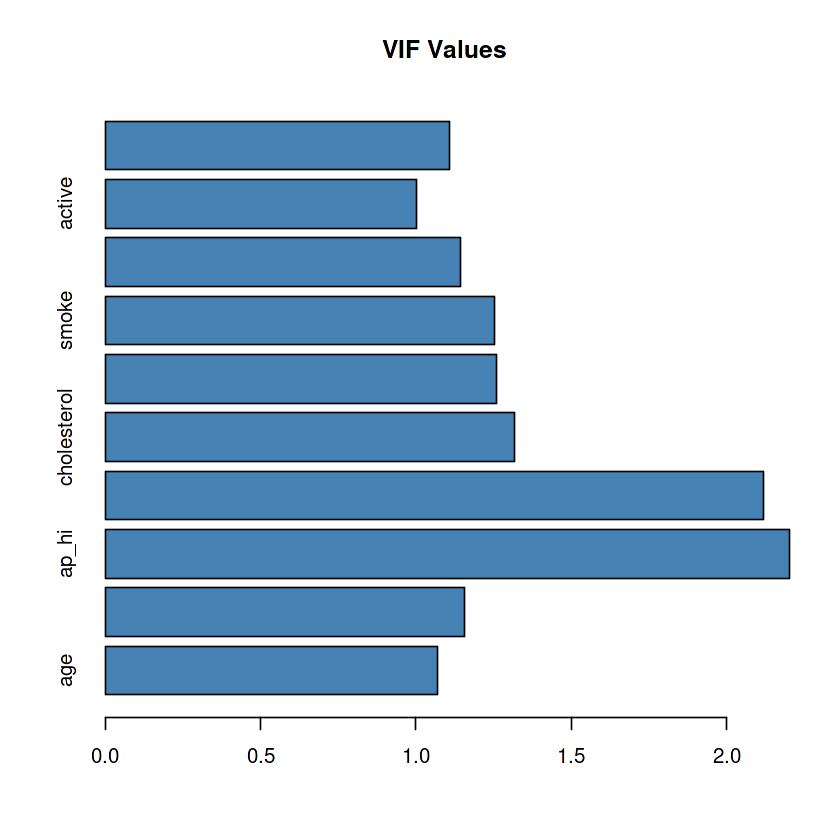

In [43]:
model2<-glm(cardio~age+alco+active+BMI+(ap_hi*ap_lo)+ (cholesterol*gluc)+(smoke*gender)+(BMI*ap_hi),data=data2)
v<-vif(model1)
barplot(v, main = "VIF Values", horiz = TRUE, col = "steelblue")
v

On se basant sur un article publier par le statisticien paul allison https://statisticalhorizons.com/multicollinearity/, ce type de valeurs de colinearité peut etre negliger. 
Apres le choix du modeles en partie apprentissage on effectuera une comparaison de performance avec le modele complet et avec un modele en suppprimant les variables a vif fort.

3. linearité entre chaque varible expliquative et le logit de varible reponse, avec logit(p)=log(p/1-p)

on divide l'echantillon sur 4 pour chaque variable, et on calcule la probabilité P(cardio=1) pour chaque groupe 

In [44]:

summary(data2$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  39.11   48.34   53.96   53.30   58.40   64.97 

In [45]:
#proportion du cardio d'un chaque quartile:
table(data2$cardio[data2$age>=53 &data2$age<58])


   0    1 
8560 9210 

In [46]:
p1<-mean(data2$cardio[data2$age<48])
p2<-mean(data2$cardio[data2$age>=48&data2$age<53])
p3<-mean(data2$cardio[data2$age>=53&data2$age<58])
p4<-mean(data2$cardio[data2$age>58&data2$age<64.9])
prob<-c(p1,p2,p3,p4)
prob

[1] 0.3365471 0.4270783 0.5182893 0.6341553

In [47]:
logit<-log(prob/(1-prob))

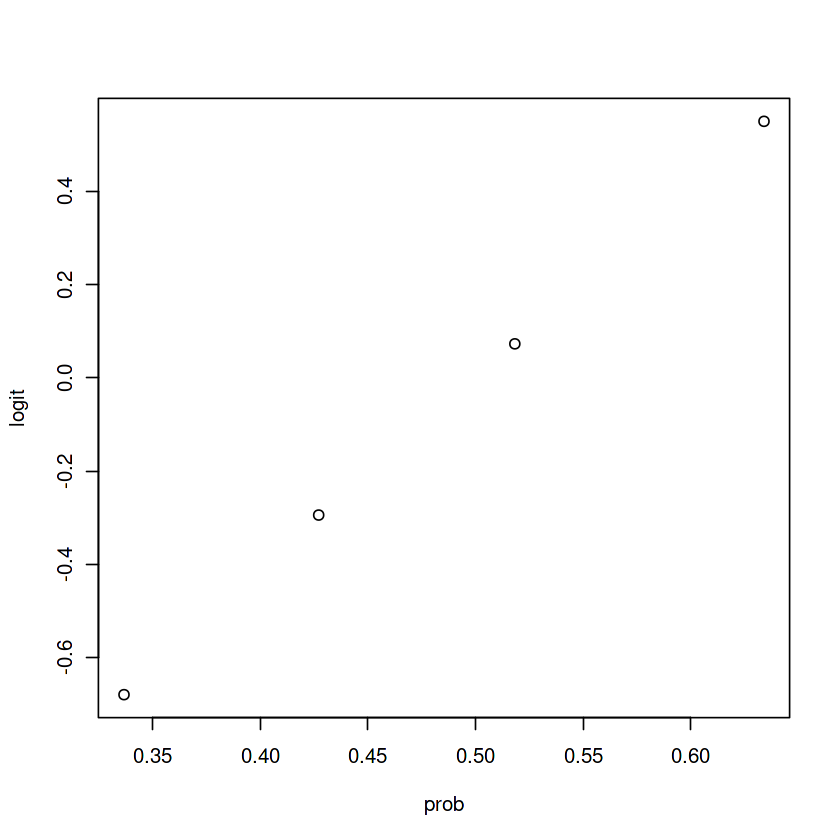

In [48]:
plot(prob,logit)

In [49]:
#on fait la meme chose pour les autres variables quantitatives:
summary(data2$ap_hi)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   16.0   120.0   120.0   126.4   140.0   230.0 

In [50]:
p1<-mean(data2$cardio[data2$ap_hi<120])
p2<-mean(data2$cardio[data2$ap_hi>=120&data2$ap_hi<126])
p3<-mean(data2$cardio[data2$ap_hi>=126&data2$ap_hi<140])
p4<-mean(data2$cardio[data2$ap_hi>=140])
prob<-c(p1,p2,p3,p4)
prob

[1] 0.2299088 0.3531703 0.5951154 0.8369478

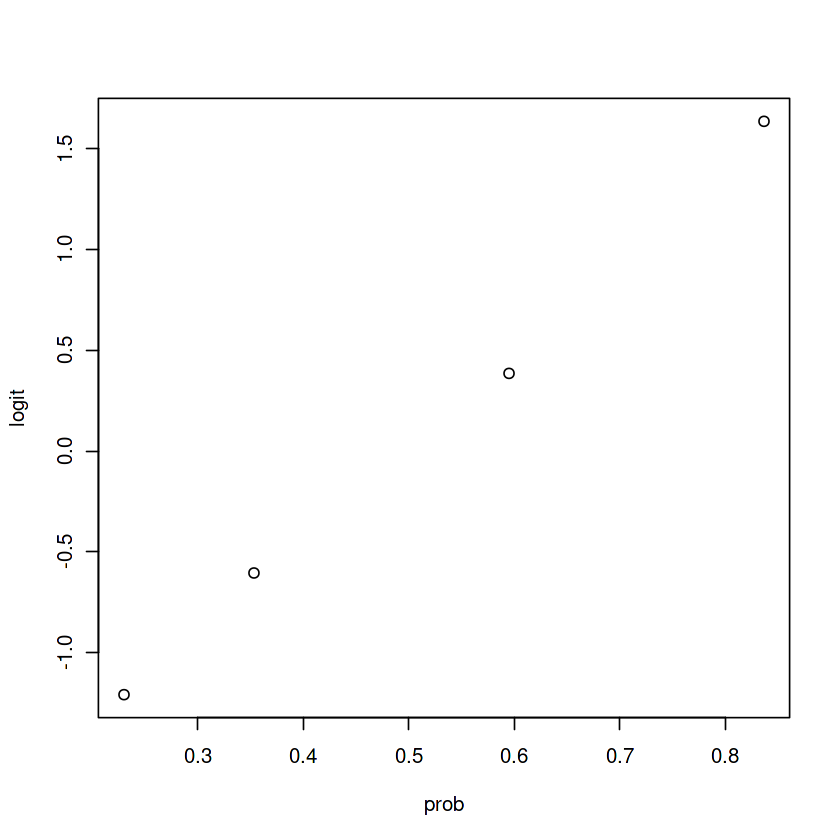

In [51]:
logit<-log(prob/(1-prob))
plot(prob,logit)

# Regression:

In [52]:
head(train)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,50.39178,2,110,80,1,1,0,0,1,0,21.96712
2,55.41918,1,140,90,3,1,0,0,1,1,34.92768
3,51.66301,1,130,70,3,1,0,0,0,1,23.50781
4,48.28219,2,150,100,1,1,0,0,1,1,28.71048
5,47.87397,1,100,60,1,1,0,0,0,0,23.01118
7,60.58356,1,130,80,3,1,0,0,1,0,37.72973


In [53]:
#regression logistique 
#feature selection
model<-glm(cardio~age+gender+ap_hi+ap_lo+cholesterol+gluc+smoke+alco+active+BMI+(ap_hi*ap_lo)+ (cholesterol*gluc)
           +(smoke*gender)+(BMI*ap_hi)+(ap_lo*BMI),data=train,family="binomial")
step(model,direction="backward")

Start:  AIC=52278.39
cardio ~ age + gender + ap_hi + ap_lo + cholesterol + gluc + 
    smoke + alco + active + BMI + (ap_hi * ap_lo) + (cholesterol * 
    gluc) + (smoke * gender) + (BMI * ap_hi) + (ap_lo * BMI)

                   Df Deviance   AIC
- gender:smoke      1    52246 52276
- ap_lo:BMI         1    52247 52277
<none>                   52246 52278
- ap_hi:ap_lo       1    52251 52281
- alco              1    52268 52298
- cholesterol:gluc  1    52279 52309
- active            1    52313 52343
- ap_hi:BMI         1    52331 52361
- age               1    53189 53219

Step:  AIC=52276.46
cardio ~ age + gender + ap_hi + ap_lo + cholesterol + gluc + 
    smoke + alco + active + BMI + ap_hi:ap_lo + cholesterol:gluc + 
    ap_hi:BMI + ap_lo:BMI

                   Df Deviance   AIC
- ap_lo:BMI         1    52247 52275
<none>                   52246 52276
- gender            1    52249 52277
- ap_hi:ap_lo       1    52251 52279
- smoke             1    52257 52285
- alco           


Call:  glm(formula = cardio ~ age + gender + ap_hi + ap_lo + cholesterol + 
    gluc + smoke + alco + active + BMI + ap_hi:ap_lo + cholesterol:gluc + 
    ap_hi:BMI, family = "binomial", data = train)

Coefficients:
     (Intercept)               age            gender             ap_hi  
      -1.778e+01         4.992e-02         3.858e-02         1.002e-01  
           ap_lo       cholesterol              gluc             smoke  
      -1.149e-02         7.012e-01         1.286e-01        -1.401e-01  
            alco            active               BMI       ap_hi:ap_lo  
      -2.374e-01        -2.165e-01         2.976e-01         1.743e-04  
cholesterol:gluc         ap_hi:BMI  
      -1.292e-01        -2.095e-03  

Degrees of Freedom: 46744 Total (i.e. Null);  46731 Residual
Null Deviance:	    64780 
Residual Deviance: 52250 	AIC: 52280

In [54]:
#creating the model on training data 
logi<-glm(formula = cardio ~ age + ap_hi + ap_lo + cholesterol + 
    gluc + smoke + alco + active + BMI + (ap_hi * ap_lo) + (cholesterol * 
    gluc)  + (BMI * ap_hi) , 
    family = "binomial", data = train)


In [55]:
#with cross validation : 
#caret package: classification and regression training 
install.packages("caret", dependencies = c("Depends", "Suggests"))
library(caret)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘prefmod’, ‘BradleyTerry2’, ‘subselect’, ‘superpc’


Warning message in install.packages("caret", dependencies = c("Depends", "Suggests")):
“installation of package ‘BradleyTerry2’ had non-zero exit status”
Warning message in install.packages("caret", dependencies = c("Depends", "Suggests")):
“installation of package ‘subselect’ had non-zero exit status”
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [56]:
train$cardio<-as.factor(train$cardio)
tc<-trainControl(method="repeatedcv",number=10,repeats=10)
fit<-train(cardio ~ ., data = train, 
                 method ="glm",
                 family=binomial(),
                 trControl = tc,
                 )
fit
summary(fit)

Generalized Linear Model 

46745 samples
   10 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 42071, 42070, 42070, 42071, 42070, 42070, ... 
Resampling results:

  Accuracy   Kappa   
  0.7285977  0.455513



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7023  -0.9170  -0.3797   0.9341   3.5306  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.074076   0.154030 -78.388  < 2e-16 ***
age           0.050174   0.001639  30.611  < 2e-16 ***
gender        0.039758   0.023700   1.678  0.09344 .  
ap_hi         0.056643   0.001119  50.631  < 2e-16 ***
ap_lo         0.010973   0.001747   6.280 3.38e-10 ***
cholesterol   0.509728   0.019086  26.707  < 2e-16 ***
gluc         -0.126712   0.021636  -5.856 4.73e-09 ***
smoke        -0.133188   0.042067  -3.166  0.00155 ** 
alco         -0.226053   0.051318  -4.405 1.06e-05 ***
active       -0.215351   0.026592  -8.098 5.58e-16 ***
BMI           0.035408   0.002533  13.979  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 64780  on 46744  degrees of freedom
Residual deviance:

In [57]:
train["ap_hi:ap_lo"]<-train["ap_hi"]*train["ap_lo"]
train["cholesterol:gluc"]<-train["cholesterol"]*train["gluc"]
train["ap_hi:BMI"]<-train["ap_hi"]*train["BMI"]
train<-select(train,-c(2))
head(train)


,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,ap_hi:ap_lo,cholesterol:gluc,ap_hi:BMI
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>
1,50.39178,110,80,1,1,0,0,1,0,21.96712,8800,1,2416.383
2,55.41918,140,90,3,1,0,0,1,1,34.92768,12600,3,4889.875
3,51.66301,130,70,3,1,0,0,0,1,23.50781,9100,3,3056.015
4,48.28219,150,100,1,1,0,0,1,1,28.71048,15000,1,4306.572
5,47.87397,100,60,1,1,0,0,0,0,23.01118,6000,1,2301.118
7,60.58356,130,80,3,1,0,0,1,0,37.72973,10400,3,4904.864


In [58]:
tc<-trainControl(method="repeatedcv",number=10,repeats=5)
fit1<-train(cardio ~ ., data = train, 
                 method ="glm",
                 family=binomial(),
                 trControl = tc,
                
                 )
fit1


Generalized Linear Model 

46745 samples
   12 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 42070, 42070, 42070, 42071, 42071, 42071, ... 
Resampling results:

  Accuracy   Kappa    
  0.7293787  0.4572387


In [59]:
summary(fit1)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5820  -0.9153  -0.3526   0.9267   3.3362  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.777e+01  9.350e-01 -19.004  < 2e-16 ***
age                       4.987e-02  1.646e-03  30.300  < 2e-16 ***
ap_hi                     1.006e-01  7.439e-03  13.519  < 2e-16 ***
ap_lo                    -1.097e-02  9.785e-03  -1.121  0.26238    
cholesterol               7.004e-01  3.913e-02  17.900  < 2e-16 ***
gluc                      1.291e-01  4.899e-02   2.636  0.00840 ** 
smoke                    -1.197e-01  4.032e-02  -2.969  0.00298 ** 
alco                     -2.325e-01  5.127e-02  -4.534 5.78e-06 ***
active                   -2.165e-01  2.663e-02  -8.127 4.38e-16 ***
BMI                       2.973e-01  2.336e-02  12.729  < 2e-16 ***
`\\`ap_hi:ap_lo\\``       1.709e-04  7.586e-05   2.253  0.02427 *  
`\\`cholesterol:gluc\\`` -1.294e-01  2.264e

In [60]:
logi1<-glm(formula = cardio ~ age + cholesterol + gluc + 
    smoke + alco + active + ap_hi:ap_lo + 
    ap_hi:BMI, family = "binomial", data = train)

In [61]:

head(train)

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,ap_hi:ap_lo,cholesterol:gluc,ap_hi:BMI
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>
1,50.39178,110,80,1,1,0,0,1,0,21.96712,8800,1,2416.383
2,55.41918,140,90,3,1,0,0,1,1,34.92768,12600,3,4889.875
3,51.66301,130,70,3,1,0,0,0,1,23.50781,9100,3,3056.015
4,48.28219,150,100,1,1,0,0,1,1,28.71048,15000,1,4306.572
5,47.87397,100,60,1,1,0,0,0,0,23.01118,6000,1,2301.118
7,60.58356,130,80,3,1,0,0,1,0,37.72973,10400,3,4904.864


on effectue un autre test pour supprimer les variables a grand VIF

In [62]:
train<-select(train,-c(2,3,10))

In [63]:
tc<-trainControl(method="repeatedcv",number=10,repeats=5)
fit3<-train(cardio ~ ., data = train, 
                 method ="glm",
                 family=binomial(),
                 trControl = tc,
                
                 )
fit3
summary(fit3)

Generalized Linear Model 

46745 samples
    9 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 42071, 42070, 42071, 42071, 42070, 42070, ... 
Resampling results:

  Accuracy   Kappa    
  0.7253739  0.4490797



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0854  -0.9256  -0.4177   0.9551   2.6830  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.110e+00  1.199e-01 -67.637  < 2e-16 ***
age                       5.209e-02  1.630e-03  31.956  < 2e-16 ***
cholesterol               7.067e-01  3.888e-02  18.176  < 2e-16 ***
gluc                      1.276e-01  4.887e-02   2.612   0.0090 ** 
smoke                    -9.877e-02  3.993e-02  -2.474   0.0134 *  
alco                     -2.363e-01  5.107e-02  -4.628 3.69e-06 ***
active                   -2.156e-01  2.645e-02  -8.151 3.62e-16 ***
`\\`ap_hi:ap_lo\\``       3.295e-04  7.032e-06  46.852  < 2e-16 ***
`\\`cholesterol:gluc\\`` -1.316e-01  2.256e-02  -5.831 5.50e-09 ***
`\\`ap_hi:BMI\\``         3.618e-04  1.910e-05  18.942  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family t

l'AIC increase alors on utilise fit1

# Prediction score:

pour utiliser le meme modele on utilise les meme transformation qu'on n'a utilise sur train data :

In [64]:
test["ap_hi:ap_lo"]<-test["ap_hi"]*test["ap_lo"]
test["cholesterol:gluc"]<-test["cholesterol"]*test["gluc"]
test["ap_hi:BMI"]<-test["ap_hi"]*test["BMI"]
test<-select(test,-c(2))

In [65]:

test$cardio<-as.factor(test$cardio)
head(test)

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,ap_hi:ap_lo,cholesterol:gluc,ap_hi:BMI
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>
6,60.03836,120,80,2,2,0,0,0,0,29.38468,9600,4,3526.161
10,54.33973,110,60,1,1,0,0,0,0,25.28257,6600,1,2781.083
11,61.72603,120,80,1,1,0,0,1,0,28.01022,9600,1,3361.227
12,51.54795,120,80,1,1,0,0,1,0,20.04745,9600,1,2405.693
14,54.27123,110,70,1,1,0,0,1,0,31.24499,7700,1,3436.949
15,39.81370,130,90,1,1,1,1,1,0,28.99789,11700,1,3769.726


In [66]:
library(Metrics)
test$prob <- predict(fit1, test)
table(test$prob, test$cardio)
accuracy(test$prob, test$cardio)


Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




   
       0    1
  0 8056 3334
  1 2177 6467

[1] 0.7249176